# Homework 1 Time Series Analysis

Emma Bea Mitchell

my github url link: https://github.com/emmabeamitchell/HW1-eds296

## Import packages

In [82]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np
import zarr

## Locate and Open CMIP6 Models

In [3]:
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [8]:
# print summary of contents
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


## Convert to DataFrame

In [9]:
# Convert the catalog to a Pandas dataframe
cat_df = catalog.df

# print the contents of the dataframe
print(cat_df)

       activity_id       institution_id      source_id       experiment_id  \
0       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
1       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
2       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
3       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
4       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
...            ...                  ...            ...                 ...   
522212        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
522213        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
522214        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
522215        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
522216        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   

       member_id table_id variable_id grid_label  \
0       r1i

## Search catalog

In [10]:
# Search through catalog, find all historical simulations
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [54]:
# Search through catalog, find all historical simulations 

res = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CESM2")
res2 = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CanESM5")

# Convert to a data frame
res_df = res.df
res2_df = res2.df

# Print all unique ensemble members ("member_id")
members = res_df.member_id.unique()
members2 = res2_df.member_id.unique()

print(members)
print(members2)

['r4i1p1f1' 'r3i1p1f1' 'r2i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r1i1p1f1'
 'r7i1p1f1' 'r9i1p1f1' 'r8i1p1f1' 'r10i1p1f1' 'r11i1p1f1']
['r24i1p1f1' 'r25i1p1f1' 'r14i1p1f1' 'r2i1p1f1' 'r17i1p1f1' 'r10i1p1f1'
 'r13i1p1f1' 'r7i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r3i1p1f1' 'r22i1p1f1'
 'r23i1p1f1' 'r8i1p1f1' 'r11i1p1f1' 'r12i1p1f1' 'r15i1p1f1' 'r19i1p1f1'
 'r16i1p1f1' 'r1i1p1f1' 'r9i1p1f1' 'r18i1p1f1' 'r4i1p1f1' 'r21i1p1f1'
 'r20i1p1f1' 'r11i1p2f1' 'r10i1p2f1' 'r7i1p2f1' 'r9i1p2f1' 'r8i1p2f1'
 'r4i1p2f1' 'r40i1p2f1' 'r3i1p2f1' 'r6i1p2f1' 'r24i1p2f1' 'r13i1p2f1'
 'r12i1p2f1' 'r5i1p2f1' 'r31i1p2f1' 'r30i1p2f1' 'r32i1p2f1' 'r29i1p2f1'
 'r28i1p2f1' 'r2i1p2f1' 'r22i1p2f1' 'r23i1p2f1' 'r26i1p2f1' 'r27i1p2f1'
 'r25i1p2f1' 'r37i1p2f1' 'r38i1p2f1' 'r39i1p2f1' 'r35i1p2f1' 'r34i1p2f1'
 'r36i1p2f1' 'r33i1p2f1' 'r1i1p2f1' 'r18i1p2f1' 'r19i1p2f1' 'r14i1p2f1'
 'r15i1p2f1' 'r17i1p2f1' 'r16i1p2f1' 'r21i1p2f1' 'r20i1p2f1']


In [59]:
# activity_id: which project do you want? CMIP = historical data
activity_ids = ['CMIP'] 
activity_ids2 = ['CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical
experiment_ids = ['historical']
experiment_ids2 = ['historical']

# member_id: which ensemble member do you want? 
member_id = 'r10i1p1f1'
member_id2 = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'
table_id2 = 'Amon'

# variable_id: which climate variables do you want? Here we want surface air temperature and precipitation
variable_id = ['tas', 'pr']
variable_ids2 = ['tas', 'pr']

In [60]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

res2 = catalog.search(activity_id=activity_ids2, source_id=source_id2, experiment_id=experiment_ids2, 
                     member_id=member_id2, table_id=table_id2, variable_id=variable_ids2)

# Display data frame associated with results
display(res.df)
display(res2.df)

hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})
hist_data2 = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20200124


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


## Historical + Future

In [61]:
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? 
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? 
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'

# variable_id: which climate variables do you want? Here we want surface air temperature and precipitation
variable_ids = 'tas'
variable_ids2 = 'pr'

In [63]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_ids)
res2 = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids,
                      member_id = member_id, table_id = table_id, variable_id=variable_ids2)

res3 = catalog.search(activity_id=activity_ids, source_id=source_id2, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_ids)
res4 = catalog.search(activity_id=activity_ids, source_id=source_id2, experiment_id=experiment_ids,
                      member_id = member_id, table_id = table_id, variable_id=variable_ids2)

# Extract data for the historical period, store as a separate xarray Dataset
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp_data = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data2 = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp_data2 = xr.open_zarr(res2.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data3 = xr.open_zarr(res3.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp_data3 = xr.open_zarr(res3.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data4 = xr.open_zarr(res4.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp_data4 = xr.open_zarr(res4.df['zstore'][2], storage_options={'anon': True})

## Find area of interest

I'm choosing Belgium for this one

In [70]:
# Define min/max bounds for region of interest (Belgium)
lat_min, lat_max = 2.51357303225, 49.5294835476
lon_min, lon_max = 6.15665815596, 51.4750237087

The climate in Belgium is temperate, and because it is a maritime climate (the country borders the ocean), the temperature is mild and the precipitation is even throughout the year. Air masses from the Atlantic are what influences the climate there the most. Although there are certainly urban areas in Belgium, alongside sandy plains and forests, the majority of the country is farmland. Belgium may be affected by climate change through increased temperature and sea level rise. This may result in crops currently grown in the country no longer being viable, and land being absorbed into the ocean. 

In [67]:
# Print the time array to see what format it uses
print(hist_data.time)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 ...
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time


In [72]:
# Concatenate historical and future projection data 
cesm2_data = xr.concat([hist_data, ssp_data], dim="time")
cesm2_data2 = xr.concat([hist_data2, ssp_data2], dim="time")
canesm5_data = xr.concat([hist_data3, ssp_data3], dim="time")
canesm5_data2 = xr.concat([hist_data4, ssp_data4], dim="time")

# Convert time to datetime64 format
time = cesm2_data.time.astype('datetime64[ns]')
time2 = cesm2_data2.time.astype('datetime64[ns]')
time3 = canesm5_data.time.astype('datetime64[ns]')
time4 = canesm5_data2.time.astype('datetime64[ns]')

In [80]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
cesm_BE_lat = (cesm2_data.lat >= lat_min) & (cesm2_data.lat <= lat_max)
cesm_BE_lon = (cesm2_data.lon >= lon_min) & (cesm2_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
cesm_tas_BE = cesm2_data.where(cesm_BE_lat & cesm_BE_lon, drop=True)

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
cesm_BE_lat2 = (cesm2_data2.lat >= lat_min) & (cesm2_data2.lat <= lat_max)
cesm_BE_lon2 = (cesm2_data2.lon >= lon_min) & (cesm2_data2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
cesm_pr_BE2 = cesm2_data2.where(cesm_BE_lat2 & cesm_BE_lon2, drop=True)

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
cane_BE_lat = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
cane_BE_lon = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
cane_tas_BE = canesm5_data.where(cane_BE_lat & cane_BE_lon, drop=True)

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
cane_BE_lat2 = (canesm5_data2.lat >= lat_min) & (canesm5_data2.lat <= lat_max)
cane_BE_lon2 = (canesm5_data2.lon >= lon_min) & (canesm5_data2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
cane_pr_BE = canesm5_data2.where(cane_BE_lat2 & cane_BE_lon2, drop=True)

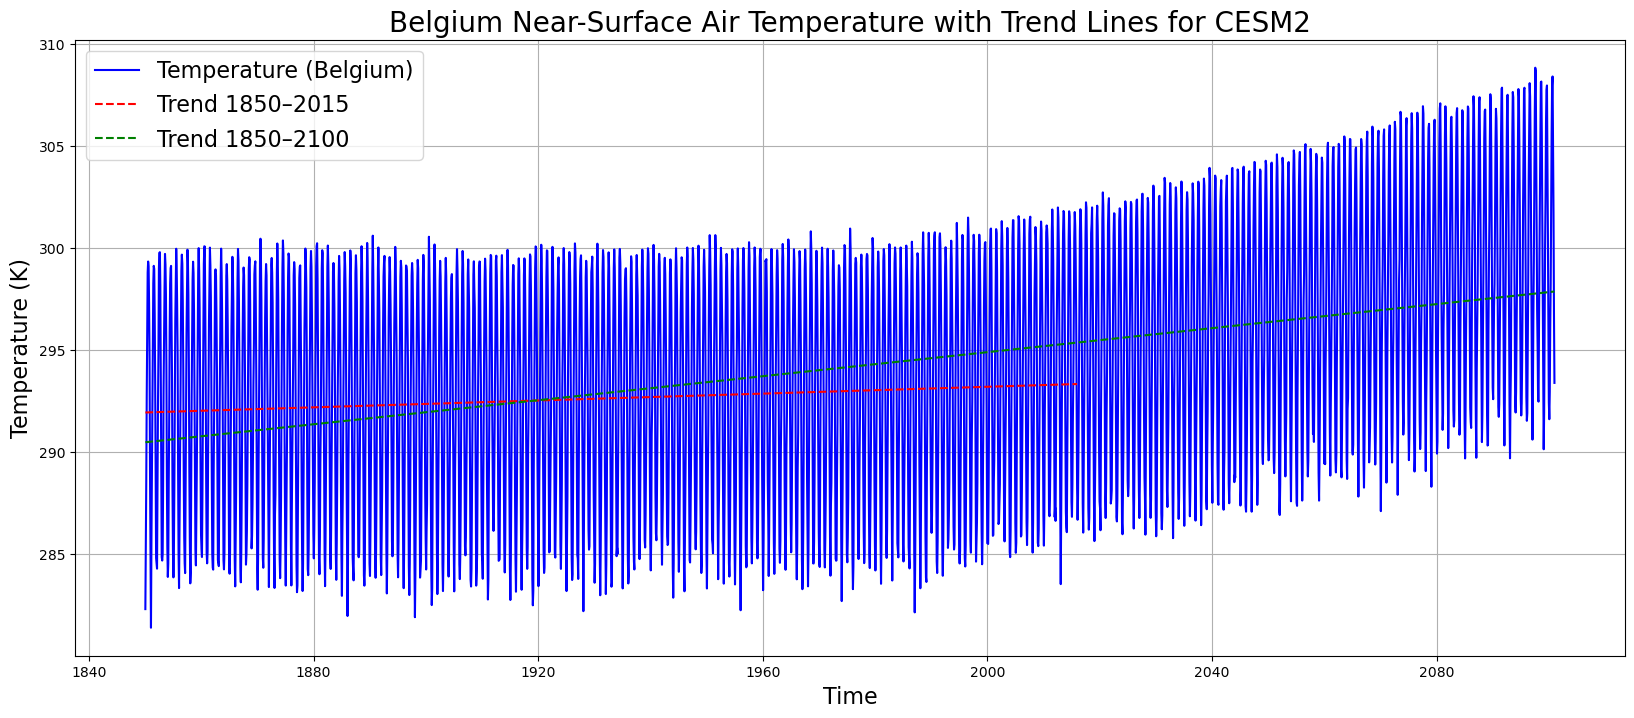

In [94]:
# Compute spatial average
tas_mean = cesm_tas_BE.tas.mean(dim=["lat", "lon"])
time = cesm_tas_BE.time.astype('datetime64[ns]')

# Masks
hist_mask = (time >= np.datetime64('1850-01-01')) & (time <= np.datetime64('2015-12-31'))
full_mask = (time >= np.datetime64('1850-01-01')) & (time <= np.datetime64('2100-12-31'))

# Historical trend (1850–2015)
time_hist = time[hist_mask]
tas_hist = tas_mean.sel(time=hist_mask)
x_hist = np.arange(len(time_hist))
z_hist = np.polyfit(x_hist, tas_hist.values, 1)
p_hist = np.poly1d(z_hist)

# Full trend (1850–2100)
time_full = time[full_mask]
tas_full = tas_mean.sel(time=full_mask)
x_full = np.arange(len(time_full))
z_full = np.polyfit(x_full, tas_full.values, 1)
p_full = np.poly1d(z_full)

# Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_mean, label='Temperature (Belgium)', color='blue')
ax.plot(time_hist, p_hist(x_hist), 'r--', label='Trend 1850–2015')
ax.plot(time_full, p_full(x_full), 'g--', label='Trend 1850–2100')

# Formatting
ax.set_title("Belgium Near-Surface Air Temperature with Trend Lines for CESM2", fontsize=20)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)
ax.legend(fontsize=16)
ax.grid()
plt.show()



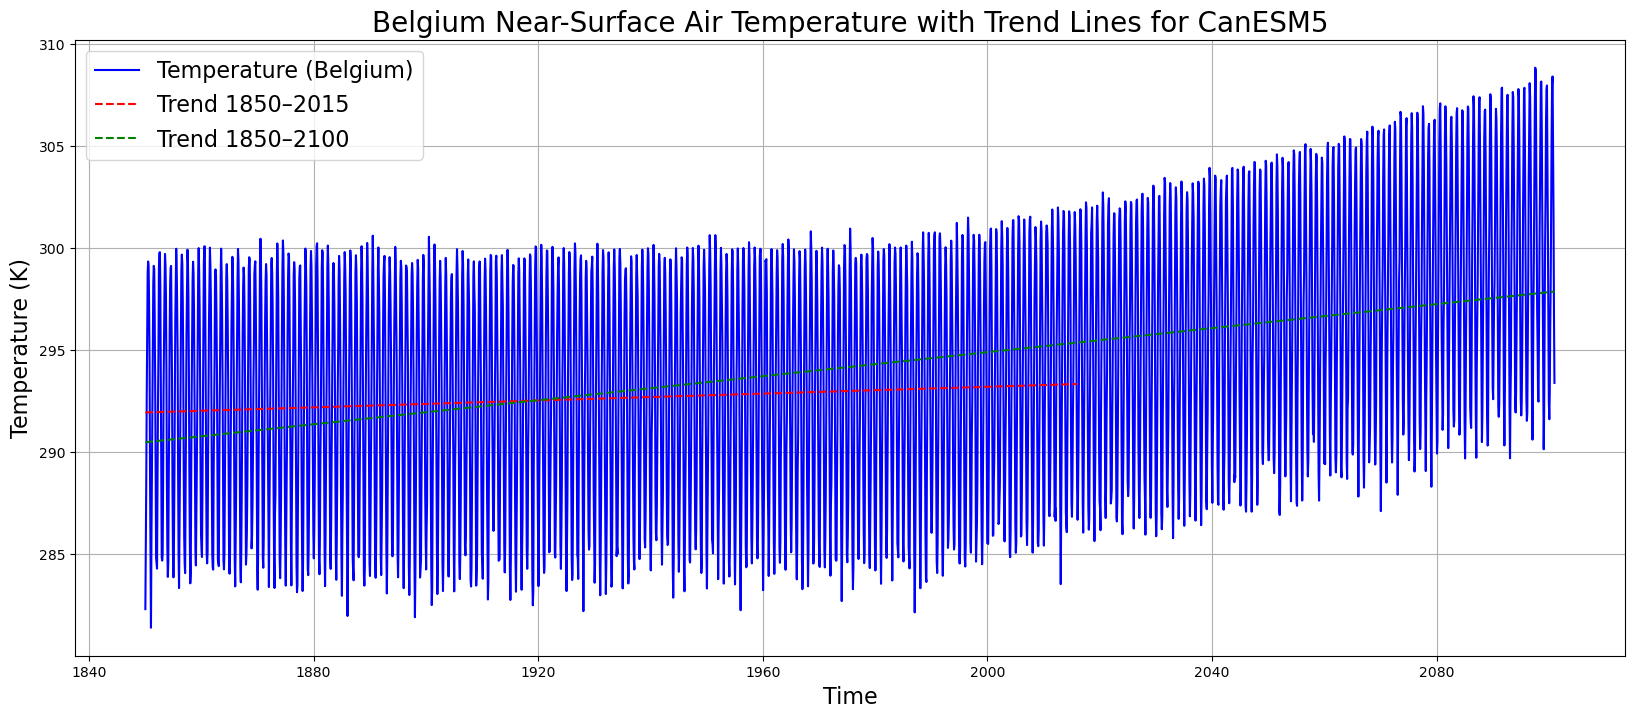

In [93]:
# Compute spatial average
tas_mean = cane_tas_BE.tas.mean(dim=["lat", "lon"])
time = cane_tas_BE.time.astype('datetime64[ns]')

# Masks
hist_mask = (time >= np.datetime64('1850-01-01')) & (time <= np.datetime64('2015-12-31'))
full_mask = (time >= np.datetime64('1850-01-01')) & (time <= np.datetime64('2100-12-31'))

# Historical trend (1850–2015)
time_hist = time[hist_mask]
tas_hist = tas_mean.sel(time=hist_mask)
x_hist = np.arange(len(time_hist))
z_hist = np.polyfit(x_hist, tas_hist.values, 1)
p_hist = np.poly1d(z_hist)

# Full trend (1850–2100)
time_full = time[full_mask]
tas_full = tas_mean.sel(time=full_mask)
x_full = np.arange(len(time_full))
z_full = np.polyfit(x_full, tas_full.values, 1)
p_full = np.poly1d(z_full)

# Plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_mean, label='Temperature (Belgium)', color='blue')
ax.plot(time_hist, p_hist(x_hist), 'r--', label='Trend 1850–2015')
ax.plot(time_full, p_full(x_full), 'g--', label='Trend 1850–2100')

# Formatting
ax.set_title("Belgium Near-Surface Air Temperature with Trend Lines for CanESM5", fontsize=20)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Temperature (K)", fontsize=16)
ax.legend(fontsize=16)
ax.grid()
plt.show()



In both plots, the trend line for 1850-2015 is significantly less steep than the one for 1850 - 2100, meaning that the near surface air temperature is rising faster in the 1850-2100 timeframe than in the 1850-2015 time frame. We can also see that in the temperature plots themselves, as the slope appears to be getting steeper after 1980 or so. 

The results of the plot means that temperature is rising at an increasing pace (at least faster than prior to the slope change around 1980), which could have detrimental implications for the ecosystem and people in Belgium. Fifty percent of Belgium's land is farmland. These plants are suited to Belgium's temperate climate. Farmers and plants would suffer if the temperature continues to rise like in the model, as plants will no longer be viable. Belgium also has a lot of forest land, an ecosystem that would also struggle to survive in warmer climates. This could result in a species shift and/or increasing deaths within plants and animals. 